In [1]:
import pandas as pd
import pickle5 as pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from statannot import add_stat_annotation

In [2]:
with open('FinalProcessed_withTopics.pkl', "rb") as fh:
    df = pickle.load(fh)

In [3]:
topics = df.columns[:45]

In [4]:
jan = df[df['month'] == 'January'][df.columns[:45]].values
feb = df[df['month'] == 'February'][df.columns[:45]].values
mar = df[df['month'] == 'March'][df.columns[:45]].values

In [5]:
jan_df = pd.concat([pd.Series(['Jan']*jan.shape[0],name='month'), pd.DataFrame(jan)], axis=1)
feb_df = pd.concat([pd.Series(['Feb']*feb.shape[0],name='month'), pd.DataFrame(feb)], axis=1)
mar_df = pd.concat([pd.Series(['Mar']*mar.shape[0],name='month'), pd.DataFrame(mar)], axis=1)

In [6]:
data = pd.concat([jan_df,feb_df,mar_df]).melt(id_vars=['month'], value_vars=jan_df.columns[1:])

In [7]:
data['variable'] = topics[[int(x) for x in list(data['variable'].values)]]

In [8]:
data

,month,variable,value
0,Jan,Topic00_IntenseExpression,0.4701
1,Jan,Topic00_IntenseExpression,0.0159
2,Jan,Topic00_IntenseExpression,0.0159
3,Jan,Topic00_IntenseExpression,0.0093
4,Jan,Topic00_IntenseExpression,0.0101
...,...,...,...
12130015,Mar,Topic44_Testing,0.0065
12130016,Mar,Topic44_Testing,0.0051
12130017,Mar,Topic44_Testing,0.0065
12130018,Mar,Topic44_Testing,0.0139


In [9]:
statistic, pvals_1 = ttest_ind(jan, feb, equal_var=False, axis=0)
statistic, pvals_2 = ttest_ind(feb, mar, equal_var=False, axis=0)
statistic, pvals_3 = ttest_ind(jan, mar, equal_var=False, axis=0)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Jan v.s. Feb: Custom statistical test, P_val:2.089e-67
Feb v.s. Mar: Custom statistical test, P_val:8.991e-02
Jan v.s. Mar: Custom statistical test, P_val:3.547e-68
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Jan v.s. Feb: Custom statistical test, P_val:1.000e+00
Feb v.s. Mar: Custom statistical test, P_val:1.219e-249
Jan v.s. Mar: Custom statistical test, P_val:1.380e-103
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Jan v.s. Feb: Custom statistical test, P_val:2.319e-06
Feb v.s. Mar: Custom statistical test, P_val:1.154e-01
Jan v.s. Mar: Custom statistical test, P_val:4.908e-05
p-value ann

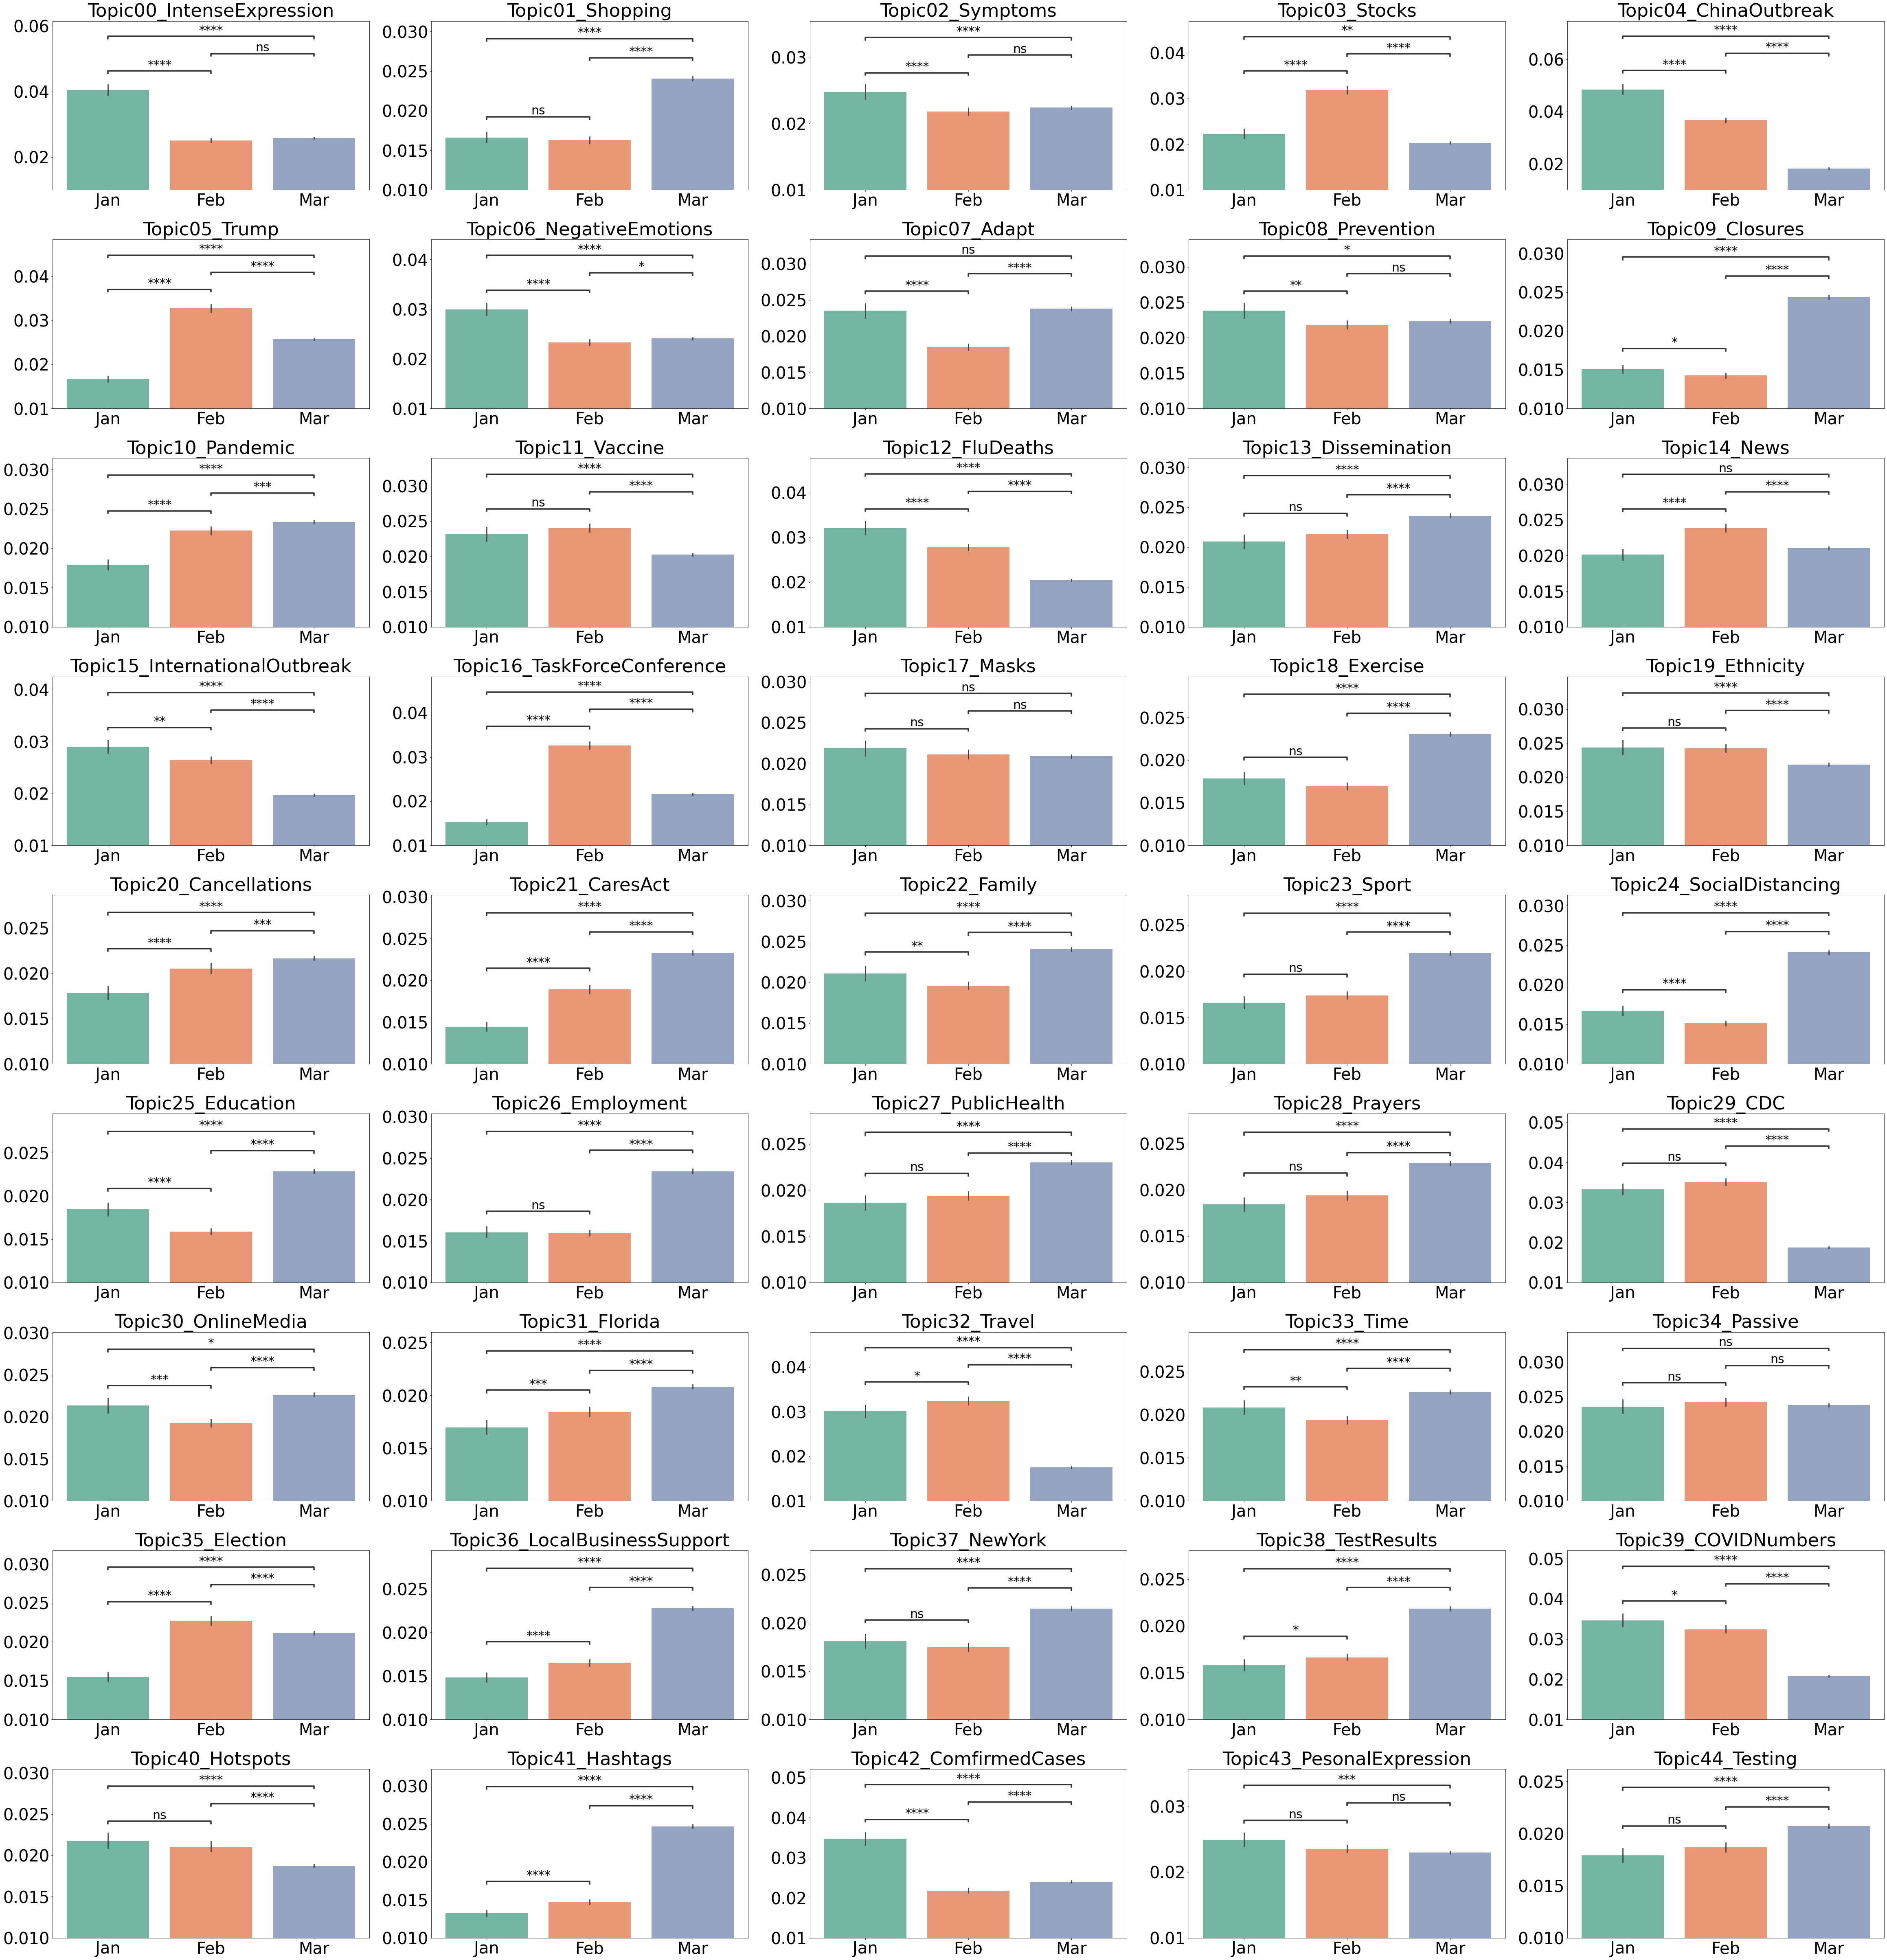

In [10]:
fig, axes = plt.subplots(nrows=9, ncols=5,figsize=(65,67.5)) # (width=13, height=7.5)
axes = axes.flatten()
for i,item in enumerate(range(45)):
    topic = topics[item]
    curr = data[data['variable'] == topic]
    sns.barplot(x='month', y='value', data=curr, ax=axes[i], 
                palette=sns.color_palette('Set2'))
    axes[i].set_ylim(bottom=0.01)
    
    c = curr.groupby('month').mean()
    c['month'] = c.index
    c['value'] + 2*np.std(c['value'])
    c['variable'] = [topic]*3
    
    pval = [x[item]*3 for x in [pvals_1, pvals_2, pvals_3]]
    pval = [x if x <= 1 else 1 for x in pval]
    
    add_stat_annotation(axes[i], data=c, x='month', y='value', order=['Jan', 'Feb', 'Mar'],
                        pvalues=pval,
                        box_pairs=[("Jan", "Feb"), ("Feb", "Mar"), ("Jan", "Mar")],
                        perform_stat_test=False,test=None,text_format='star',loc='inside',verbose=2,
                        line_offset_to_box=0.15, text_offset=0.15, fontsize=30, linewidth=3.5)
    
    axes[i].tick_params(axis='x', labelsize=40)
    axes[i].tick_params(axis='y', labelsize=40)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(topic, fontsize=45)

fig.tight_layout(w_pad=3, h_pad=3, pad=3)
fig.show()